In [61]:
# Impor Paket / Library yang diperlukan
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB3, EfficientNetB7
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Conv2D, DepthwiseConv2D, SeparableConv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import time
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns


In [62]:
# Menginisialisasi kecepatan pembelajaran awal , Jumlah periode yang akan dilatih dan Ukuran tumpukan
INIT_LR = 1e-4
EPOCHS = 30
BS = 32

NETWORK = "13_mobilenet" 

dataset = r"C:\Users\raffy\Documents\pythons\dataset";
model_path = NETWORK + "_" + str(EPOCHS) + ".model"
print(model_path)

# Ambil daftar gambar di direktori kumpulan data yang sudah dibuat lalu Inisialisasi
# daftar data (mis., Gambar) dan gambar kelas
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset)) #Folder Training berisi gambar Pakai Masker dan Tidak
data = []
labels = []

13_mobilenet_30.model
[INFO] loading images...


In [63]:
# Masukkan data diatas dalam Path Gambar
for imagePath in imagePaths:
	# ekstrak label kelas dari nama file
	label = imagePath.split(os.path.sep)[-2]

	# Masukkan / Impor gambar dengan piksel (224x224) dan Lakukan prosesnya terlebih dahulu
	image = load_img(imagePath, target_size=(224, 224, 3))
	image = img_to_array(image)
	image = preprocess_input(image)

	# Perbarui daftar data dan label masing-masing
	data.append(image)
	labels.append(label)

In [64]:
print(len(data))

450


In [65]:
print(len(labels))

450


In [66]:
# Konversikan data dan label ke array NumPy
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [67]:
# lakukan Pengkodean satu-hot pada label
#lb = LabelBinarizer()
lb = LabelEncoder()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)
# print(lb.classes_)

In [68]:
# Mempartisi data menjadi pemisahan pelatihan dan pengujian menggunakan : 
# 75% dari data untuk pelatihan dan 25% sisanya untuk pengujian
# (trainX, testX, trainY, testY) = train_test_split(data, labels,
# 	test_size=0.20, stratify=labels, random_state=42)

In [69]:
#splits
crossval = StratifiedKFold(n_splits=5)
crossval.get_n_splits(data)

5

In [70]:
# Membangun generator gambar pelatihan untuk augmentasi data
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.25,
	width_shift_range=0.25,
	height_shift_range=0.25,
	shear_range=0.15,
	horizontal_flip=True,
    # brightness_range=(0.5,2.0),
	fill_mode="nearest")

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
12/12 [==============================] - 6s 423ms/step - loss: 1.5646 - accuracy: 0.2806 - val_loss: 1.0778 - val_accuracy: 0.4000
Epoch 2/30
12/12 [==============================] - 5s 382ms/step - loss: 1.2014 - accuracy: 0.4083 - val_loss: 0.8525 - val_accuracy: 0.6000
Epoch 3/30
12/12 [==============================] - 5s 381ms/step - loss: 0.9057 - accuracy: 0.5611 - val_loss: 0.7128 - val_accuracy: 0.7444
Epoch 4/30
12/12 [==============================] - 5s 387ms/step - loss: 0.8447 - accuracy: 0.6056 - val_loss: 0.6387 - val_accuracy: 0.7556
Epoch 5/30
12/12 [==============================] - 5s 384ms/step - loss: 0.7445 - accuracy: 0.6972 - val_loss: 0.5539 - val_accuracy: 0.8333
Epoch 6/30
12/12 [==============================] - 5s 383ms/step - loss: 0.6726 - accuracy: 0.6944 - val_loss: 0.5017 - val_accuracy: 0.8333
Epoch 7/30
12/12 [==============================] - 5s 387ms/step - loss: 0.6043 - accuracy: 0.725

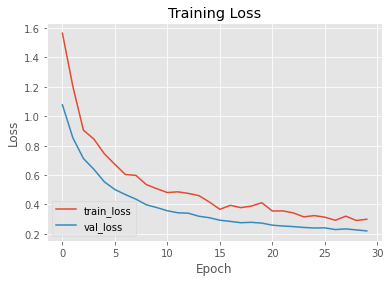

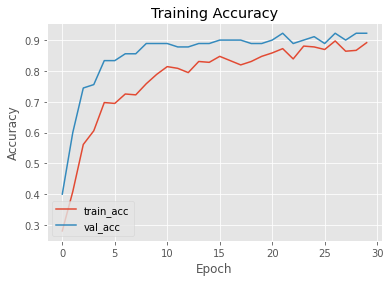

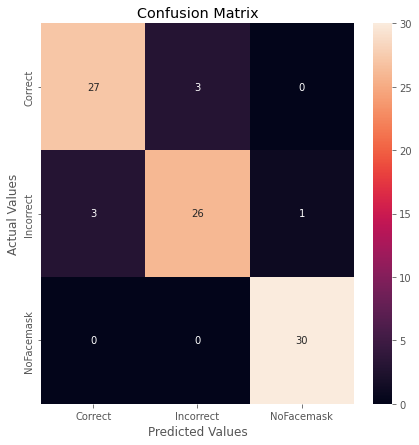

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
12/12 [==============================] - 6s 422ms/step - loss: 1.4182 - accuracy: 0.3583 - val_loss: 1.0129 - val_accuracy: 0.5111
Epoch 2/30
12/12 [==============================] - 5s 385ms/step - loss: 1.0844 - accuracy: 0.4917 - val_loss: 0.7942 - val_accuracy: 0.6778
Epoch 3/30
12/12 [==============================] - 5s 383ms/step - loss: 0.9581 - accuracy: 0.5639 - val_loss: 0.6553 - val_accuracy: 0.7444
Epoch 4/30
12/12 [==============================] - 5s 387ms/step - loss: 0.7831 - accuracy: 0.6250 - val_loss: 0.5691 - val_accuracy: 0.7556
Epoch 5/30
12/12 [==============================] - 5s 385ms/step - loss: 0.7210 - accuracy: 0.6833 - val_loss: 0.5131 - val_accuracy: 0.8111
Epoch 6/30
12/12 [==============================] - 5s 384ms/step - loss: 0.6240 - accuracy: 0.7528 - val_loss: 0.4558 - val_accuracy: 0.8444
Epoch 7/30
12/12 [==============================] - 5s 391ms/step - loss: 0.5783 - accuracy: 0.755

<Figure size 432x288 with 0 Axes>

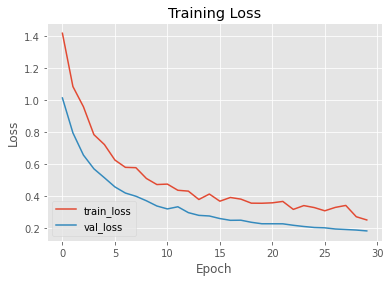

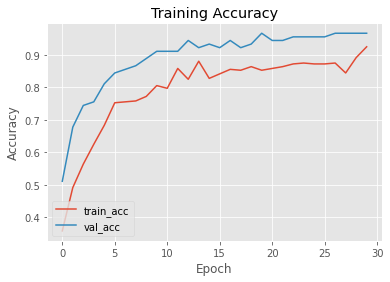

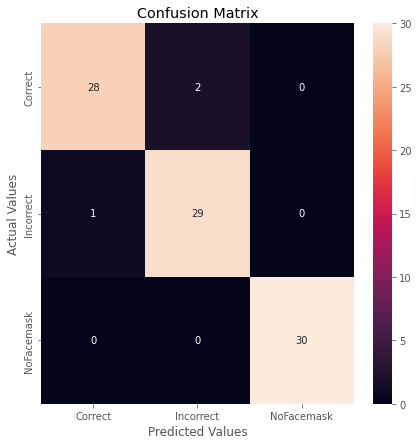

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
12/12 [==============================] - 7s 431ms/step - loss: 1.1771 - accuracy: 0.4722 - val_loss: 0.8688 - val_accuracy: 0.6222
Epoch 2/30
12/12 [==============================] - 5s 393ms/step - loss: 1.0416 - accuracy: 0.4917 - val_loss: 0.7647 - val_accuracy: 0.6667
Epoch 3/30
12/12 [==============================] - 5s 398ms/step - loss: 0.8918 - accuracy: 0.6000 - val_loss: 0.6345 - val_accuracy: 0.7667
Epoch 4/30
12/12 [==============================] - 5s 388ms/step - loss: 0.7941 - accuracy: 0.6500 - val_loss: 0.5635 - val_accuracy: 0.8111
Epoch 5/30
12/12 [==============================] - 5s 398ms/step - loss: 0.6707 - accuracy: 0.7222 - val_loss: 0.5231 - val_accuracy: 0.8222
Epoch 6/30
12/12 [==============================] - 5s 408ms/step - loss: 0.5996 - accuracy: 0.7444 - val_loss: 0.4829 - val_accuracy: 0.8222
Epoch 7/30
12/12 [==============================] - 5s 401ms/step - loss: 0.5628 - accuracy: 0.766

<Figure size 432x288 with 0 Axes>

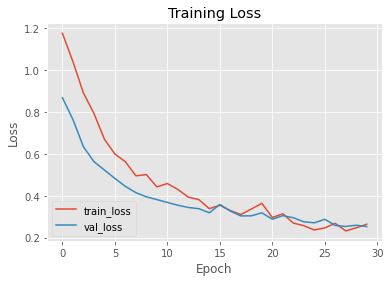

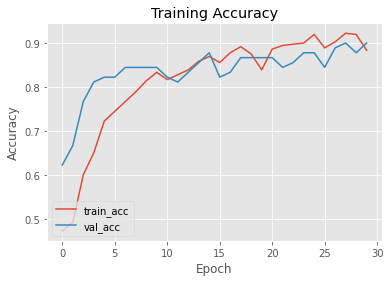

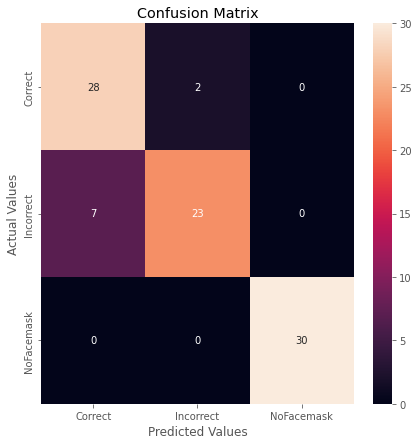

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
12/12 [==============================] - 7s 465ms/step - loss: 1.2868 - accuracy: 0.3667 - val_loss: 0.8989 - val_accuracy: 0.5000
Epoch 2/30
12/12 [==============================] - 5s 439ms/step - loss: 0.9679 - accuracy: 0.5222 - val_loss: 0.7622 - val_accuracy: 0.6667
Epoch 3/30
12/12 [==============================] - 5s 391ms/step - loss: 0.8848 - accuracy: 0.5750 - val_loss: 0.6802 - val_accuracy: 0.6556
Epoch 4/30
12/12 [==============================] - 5s 393ms/step - loss: 0.7161 - accuracy: 0.6750 - val_loss: 0.5849 - val_accuracy: 0.7556
Epoch 5/30
12/12 [==============================] - 5s 399ms/step - loss: 0.6479 - accuracy: 0.7333 - val_loss: 0.5323 - val_accuracy: 0.7889
Epoch 6/30
12/12 [==============================] - 5s 405ms/step - loss: 0.5938 - accuracy: 0.7472 - val_loss: 0.5175 - val_accuracy: 0.8111
Epoch 7/30
12/12 [==============================] - 5s 401ms/step - loss: 0.5225 - accuracy: 0.788

<Figure size 432x288 with 0 Axes>

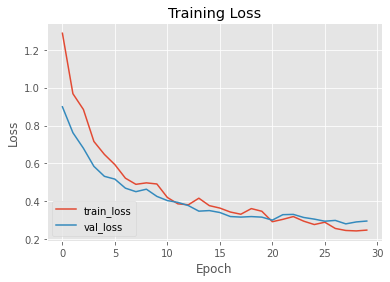

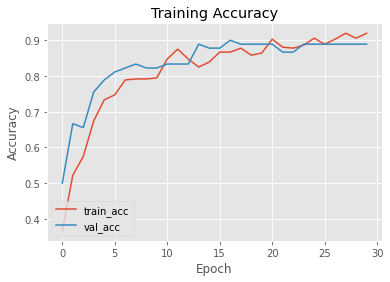

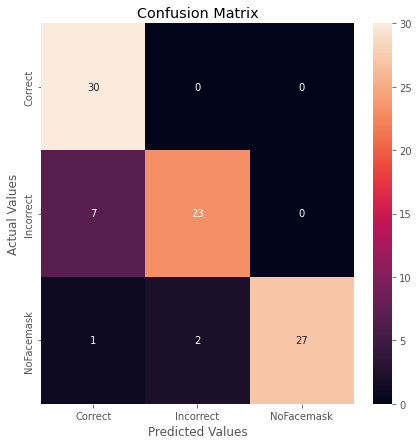

[INFO] compiling model...
[INFO] training head...
Epoch 1/30
12/12 [==============================] - 7s 445ms/step - loss: 1.4754 - accuracy: 0.3778 - val_loss: 0.9724 - val_accuracy: 0.5778
Epoch 2/30
12/12 [==============================] - 5s 407ms/step - loss: 1.0450 - accuracy: 0.5222 - val_loss: 0.7653 - val_accuracy: 0.6667
Epoch 3/30
12/12 [==============================] - 5s 406ms/step - loss: 0.9075 - accuracy: 0.5917 - val_loss: 0.6486 - val_accuracy: 0.7111
Epoch 4/30
12/12 [==============================] - 5s 417ms/step - loss: 0.8015 - accuracy: 0.6389 - val_loss: 0.5578 - val_accuracy: 0.7889
Epoch 5/30
12/12 [==============================] - 5s 412ms/step - loss: 0.6864 - accuracy: 0.7028 - val_loss: 0.4837 - val_accuracy: 0.8111
Epoch 6/30
12/12 [==============================] - 5s 436ms/step - loss: 0.6511 - accuracy: 0.7556 - val_loss: 0.4408 - val_accuracy: 0.8556
Epoch 7/30
12/12 [==============================] - 5s 417ms/step - loss: 0.5473 - accuracy: 0.783

<Figure size 432x288 with 0 Axes>

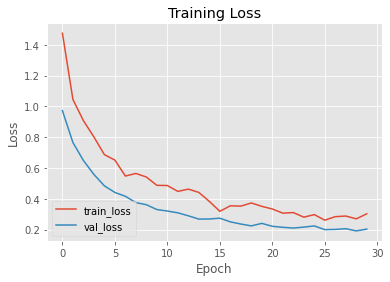

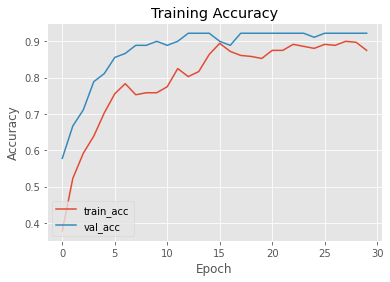

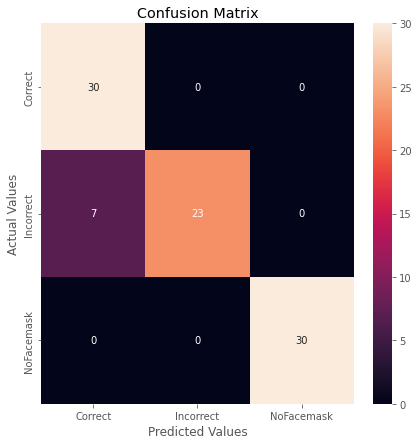

<Figure size 432x288 with 0 Axes>

In [74]:
count = 1
for train_index, test_index in crossval.split(data, labels):
    trainX, testX = data[train_index], data[test_index]
    trainY, testY = labels[train_index], labels[test_index]
    
    trainY = lb.fit_transform(labels[train_index])
    trainY = to_categorical(trainY)
    
    testY = lb.fit_transform(labels[test_index])
    testY = to_categorical(testY)
    
    starttime = time.time()
    
    file = open(str(count) + ".txt", "w")
    
    # Memuat jaringan MobileNetV2, memastikan adanya kumpulan lapisan
    baseModel = MobileNetV2(weights="mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5", include_top=False,
        input_tensor=Input(shape=(224, 224, 3)))

    # baseModel = models.load_model('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')

    baseModel.trainable = False

    # Membangun kepala model yang akan ditempatkan di atas Model dasar
    # headModel = baseModel.output #outshape = 7 x 7 x 1280 channel
    # print(headModel.shape)

    # # headModel = Conv2D(filters=320, kernel_size=3, strides=(1,1), padding='same')(headModel)
    # headModel = DepthwiseConv2D(kernel_size=3, strides=(1,1), padding='same')(headModel)
    # # headModel = SeparableConv2D(filters=320, kernel_size=3, strides=(1,1), padding='same')(headModel)
    # print(headModel.shape)

    # # headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    # headModel = Flatten(name="flatten")(headModel)
    # headModel = Dense(128, activation="relu")(headModel)
    # headModel = Dense(64, activation="relu")(headModel)
    # # headModel = Dropout(0.5)(headModel)
    # headModel = Dense(3, activation="softmax")(headModel) #ganti 2 menjadi 3

    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(3, activation="softmax")(headModel)

    # tempatkan kepala model di atas model dasar ini akan menjadi model sebenarnya yang akan dilatih
    model = Model(inputs=baseModel.input, outputs=headModel)

    # Ulangi Semua lapisan dalam model dasar dan bekukan sehingga mereka bisa melakukannya 
    # dan * tidak * diperbarui selama proses pelatihan pertama
    for layer in baseModel.layers:
        layer.trainable = False

    # Lakukan Kompilasi model ( Mengukur accuracy )
    print("[INFO] compiling model...")
    opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics=["accuracy"])

    # Lakukan pelatihan untuk kepala jaringan
    print("[INFO] training head...")
    H = model.fit(
        aug.flow(trainX, trainY, batch_size=BS),
    # 	steps_per_epoch=len(trainX) // BS,
        validation_data=(testX, testY),
    # 	validation_steps=len(testX) // BS,
        epochs=EPOCHS)

    # Buat prediksi pada set pengujian
    print("[INFO] evaluating network...")
    predIdxs = model.predict(testX, batch_size=BS)

    # Untuk setiap gambar dalam set pengujian kita perlu menemukan Indeks File label 
    # dengan probabilitas prediksi terbesar yang sesuai
    predIdxs = np.argmax(predIdxs, axis=1)

    endtime = time.time()
    # Tampilkan Laporan Klasifikasi yang diformat dengan baik
    print(classification_report(testY.argmax(axis=1), predIdxs,
        target_names=lb.classes_), file=file)

    # Tampilkan running time
    print("Running time: {} s".format(endtime-starttime))
    print("[INFO] saving mask detector model...")
    model.save(model_path + str(count), save_format="h5")
    plot_name = NETWORK + "_" + str(EPOCHS) 
    N = EPOCHS

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="lower left")
    plt.savefig(plot_name + str(count) + "_loss.png")

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plot_name + str(count) + "_acc.png")
    
    
    cf_matrix = confusion_matrix(testY.argmax(axis=1), predIdxs)
    print(cf_matrix)

    cm_df = pd.DataFrame(cf_matrix,
                     index = ['Correct','Incorrect','NoFacemask'], 
                     columns = ['Correct','Incorrect','NoFacemask'])

    #Plotting the confusion matrix
    plt.figure(figsize=(7,7))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    plt.savefig(plot_name + str(count) + "_cm.png")
    
    file.close()
    
    count += 1

In [ ]:
starttime = time.time()
# Memuat jaringan MobileNetV2, memastikan adanya kumpulan lapisan
baseModel = MobileNetV2(weights="mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5", include_top=False,
 	input_tensor=Input(shape=(224, 224, 3)))

# baseModel = models.load_model('mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5')

baseModel.trainable = False

# Membangun kepala model yang akan ditempatkan di atas Model dasar
# headModel = baseModel.output #outshape = 7 x 7 x 1280 channel
# print(headModel.shape)

# # headModel = Conv2D(filters=320, kernel_size=3, strides=(1,1), padding='same')(headModel)
# headModel = DepthwiseConv2D(kernel_size=3, strides=(1,1), padding='same')(headModel)
# # headModel = SeparableConv2D(filters=320, kernel_size=3, strides=(1,1), padding='same')(headModel)
# print(headModel.shape)

# # headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dense(64, activation="relu")(headModel)
# # headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel) #ganti 2 menjadi 3

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# tempatkan kepala model di atas model dasar ini akan menjadi model sebenarnya yang akan dilatih
model = Model(inputs=baseModel.input, outputs=headModel)

# Ulangi Semua lapisan dalam model dasar dan bekukan sehingga mereka bisa melakukannya 
# dan * tidak * diperbarui selama proses pelatihan pertama
for layer in baseModel.layers:
	layer.trainable = False

# Lakukan Kompilasi model ( Mengukur accuracy )
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# Lakukan pelatihan untuk kepala jaringan
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
# 	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

# Buat prediksi pada set pengujian
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# Untuk setiap gambar dalam set pengujian kita perlu menemukan Indeks File label 
# dengan probabilitas prediksi terbesar yang sesuai
predIdxs = np.argmax(predIdxs, axis=1)

endtime = time.time()
# Tampilkan Laporan Klasifikasi yang diformat dengan baik
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# Tampilkan running time
print("Running time: {} s".format(endtime-starttime))

In [ ]:
# Lakukan Penyimpanan model ke disk
print("[INFO] saving mask detector model...")
model.save(model_path, save_format="h5") #save ke format .h5

# Munculkan Hasil Klasifikasi , Kompilasi , Pelatihan data diatas dan amatilah akurasi pelatihan
plot_name = NETWORK + "_" + str(EPOCHS) 
N = EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(plot_name + "_loss.png")

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot_name + "_acc.png")

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
cf_matrix = confusion_matrix(testY.argmax(axis=1), predIdxs)
print(cf_matrix)

In [ ]:
import pandas as pd
import seaborn as sns

cm_df = pd.DataFrame(cf_matrix,
                     index = ['Correct','Incorrect','NoFacemask'], 
                     columns = ['Correct','Incorrect','NoFacemask'])

#Plotting the confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()